In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [22]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [23]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (9690, 2304)
= Shape of y_train is  : (9690, 1)
= Shape of X_test is   : (3090, 2304)
= Shape of y_test is   : (3090, 1)


In [24]:
clf = AdaBoostClassifier(random_state=42)

In [25]:
clf.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [26]:
y_train_pred = clf.predict(X_train)

In [27]:
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Training Set: {train_accuracy}")

Accuracy on Training Set: 0.2835913312693498


In [28]:
y_test_pred = clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set: ", accuracy)


Accuracy on Test Set:  0.2401294498381877


In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.05      0.28      0.08        60
           1       0.39      0.44      0.41       720
           2       0.43      0.19      0.27       750
           3       0.33      0.17      0.22       450
           4       0.52      0.10      0.17       660
           5       0.67      0.13      0.22        60
           6       0.07      0.21      0.11        90
           7       0.01      0.15      0.02        60
           8       0.42      0.45      0.43       150
           9       0.22      0.17      0.19        90

    accuracy                           0.24      3090
   macro avg       0.31      0.23      0.21      3090
weighted avg       0.40      0.24      0.27      3090



In [31]:
# Calculating precision, recall, and F1-score for each class
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)

In [32]:
#Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})
df

,Precision,F1 Score,Recall
0,0.047222,0.080952,0.283333
1,0.387805,0.412987,0.441667
2,0.428152,0.267644,0.194667
3,0.327511,0.220913,0.166667
4,0.515152,0.171717,0.103030
5,0.666667,0.222222,0.133333
6,0.072243,0.107649,0.211111
7,0.012748,0.023499,0.150000
8,0.421384,0.433657,0.446667
9,0.220588,0.189873,0.166667


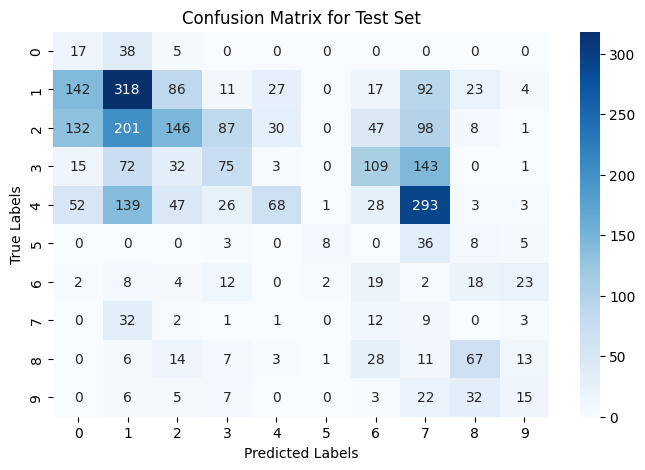

In [33]:
# Generate and visualize the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [34]:
X_train_new_30, X_test_30 = train_test_split(X_train, test_size=0.3, random_state=42)
X_test_new_30 = pd.concat([X_test, X_test_30], ignore_index=True)

In [35]:
y_train_new_30, y_test_30 = train_test_split(y_train, test_size=0.3, random_state=42)
y_test_new_30 = pd.concat([y_test, y_test_30], ignore_index=True)

In [36]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train_new_30.shape)
print("= Shape of y_train is  :", y_train_new_30.shape)
print("= Shape of X_test is   :", X_test_new_30.shape)
print("= Shape of y_test is   :", y_test_new_30.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (6783, 2304)
= Shape of y_train is  : (6783, 1)
= Shape of X_test is   : (5997, 2304)
= Shape of y_test is   : (5997, 1)


In [37]:
clf_30 = AdaBoostClassifier(random_state=42)

In [38]:
clf_30.fit(X_train_new_30, y_train_new_30)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [39]:
y_train_pred_30 = clf.predict(X_train_new_30)

In [40]:
accuracy_train_30 = accuracy_score(y_train_new_30, y_train_pred_30)

In [41]:
print("Accuracy on Training Set: ", accuracy_train_30)

Accuracy on Training Set:  0.28718855963438006


In [42]:
y_pred_30 = clf.predict(X_test_new_30)

In [43]:
accuracy_30 = accuracy_score(y_test_new_30, y_pred_30)
print("========================================")
print("= Accuracy is :", accuracy_30)
print("========================================")

= Accuracy is : 0.2571285642821411


In [44]:
# Classification Report
print(classification_report(y_test_new_30, y_pred_30))

              precision    recall  f1-score   support

           0       0.07      0.39      0.12       135
           1       0.40      0.42      0.41      1385
           2       0.43      0.21      0.28      1428
           3       0.37      0.17      0.23       876
           4       0.58      0.13      0.21      1247
           5       0.43      0.09      0.15       131
           6       0.09      0.25      0.13       190
           7       0.04      0.39      0.07       125
           8       0.42      0.49      0.45       308
           9       0.33      0.26      0.29       172

    accuracy                           0.26      5997
   macro avg       0.32      0.28      0.23      5997
weighted avg       0.42      0.26      0.28      5997



In [45]:
# Calculating precision, recall, and F1-score for each class
precision_30 = precision_score(y_test_new_30, y_pred_30, average=None)
recall_30 = recall_score(y_test_new_30, y_pred_30, average=None)
f1_30 = f1_score(y_test_new_30, y_pred_30, average=None)


In [46]:
# Creating dataframe of precision, recall, and F1-score for each class
df_30 = pd.DataFrame({'Precision': precision_30, 'F1 Score': f1_30, 'Recall': recall_30})
df_30

,Precision,F1 Score,Recall
0,0.070365,0.118993,0.385185
1,0.398915,0.411333,0.424549
2,0.434074,0.278650,0.205182
3,0.366337,0.231250,0.168950
4,0.583643,0.207124,0.125902
5,0.428571,0.150943,0.091603
6,0.085106,0.127321,0.252632
7,0.036269,0.066396,0.392000
8,0.422535,0.452489,0.487013
9,0.326087,0.290323,0.261628


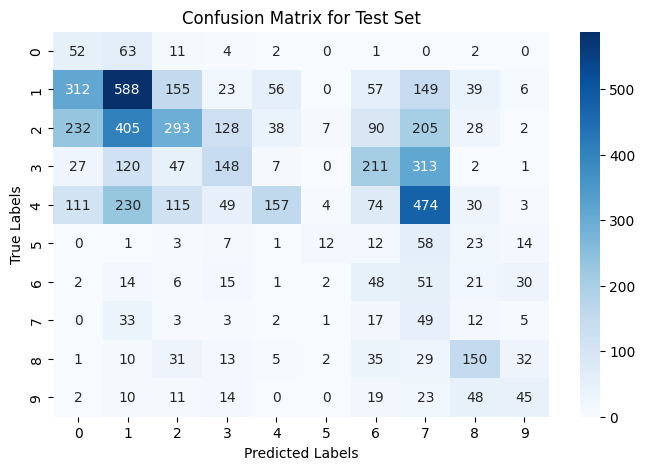

In [47]:
# Confusion Matrix
cm_30 = confusion_matrix(y_test_new_30, y_pred_30)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_30, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train_new_30), yticklabels=np.unique(y_test_new_30))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [48]:
X_train_new_60, X_test_60 = train_test_split(X_train, test_size=0.6, random_state=42)
X_test_new_60 = pd.concat([X_test, X_test_60], ignore_index=True)

In [49]:
y_train_new_60, y_test_60 = train_test_split(y_train, test_size=0.6, random_state=42)
y_test_new_60 = pd.concat([y_test, y_test_60], ignore_index=True)

In [50]:
clf_60 = AdaBoostClassifier(random_state=42)
clf_60.fit(X_train_new_60, y_train_new_60)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [51]:
# Accuracy on Training Set
y_train_pred_60 = clf.predict(X_train_new_60)
accuracy_train_60 = accuracy_score(y_train_new_60, y_train_pred_60)
print("Accuracy on Training Set: ", accuracy_train_60)

Accuracy on Training Set:  0.2853457172342621


In [52]:
y_pred_60 = clf.predict(X_test_new_60)

In [53]:
accuracy_60 = accuracy_score(y_test_new_60, y_pred_60)
print("========================================")
print("= Accuracy is :", accuracy_60)
print("========================================")

= Accuracy is : 0.26774483378256964


In [54]:
# Classification Report
print(classification_report(y_test_new_60, y_pred_60))

              precision    recall  f1-score   support

           0       0.07      0.40      0.12       194
           1       0.41      0.42      0.42      2056
           2       0.44      0.21      0.28      2108
           3       0.40      0.19      0.26      1316
           4       0.57      0.13      0.21      1811
           5       0.42      0.08      0.13       189
           6       0.10      0.27      0.15       309
           7       0.05      0.52      0.10       204
           8       0.42      0.50      0.46       468
           9       0.33      0.29      0.31       249

    accuracy                           0.27      8904
   macro avg       0.32      0.30      0.24      8904
weighted avg       0.42      0.27      0.29      8904



In [55]:
# Finding precision, recall, and F1-score for each class
precision_60 = precision_score(y_test_new_60, y_pred_60, average=None)
recall_60 = recall_score(y_test_new_60, y_pred_60, average=None)
f1_60 = f1_score(y_test_new_60, y_pred_60, average=None)

In [56]:
# Creating dataframe of precision, recall, and F1-score for each class
df_60 = pd.DataFrame({'Precision': precision_60, 'F1 Score': f1_60, 'Recall': recall_60})
df_60

,Precision,F1 Score,Recall
0,0.069457,0.118451,0.402062
1,0.408068,0.415473,0.423152
2,0.440000,0.283140,0.208729
3,0.404839,0.259298,0.190729
4,0.567237,0.209009,0.128106
5,0.416667,0.133333,0.079365
6,0.102190,0.148541,0.271845
7,0.053347,0.096759,0.519608
8,0.424188,0.459883,0.502137
9,0.330317,0.310638,0.293173


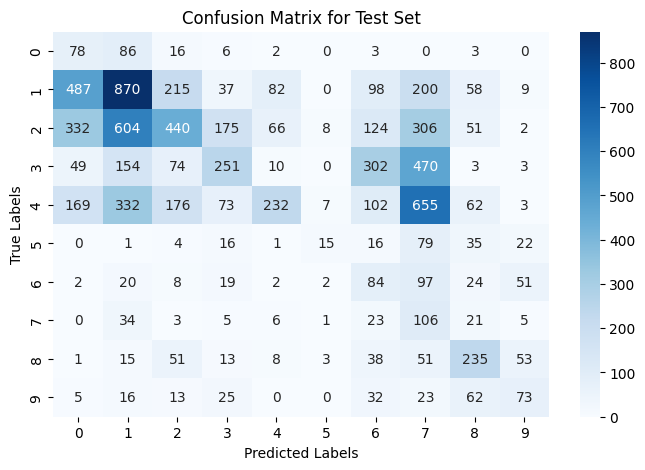

In [57]:
# Confusion Matrix
cm_60 = confusion_matrix(y_test_new_60, y_pred_60)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_60, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train_new_60), yticklabels=np.unique(y_test_new_60))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()